In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv1D, Flatten, MaxPool1D, Dense, Dropout
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load the training dataset
train_set = pd.read_csv('train-1.csv')
train_set.shape

(7352, 563)

In [ ]:
# Show some of the first few cases in the dataset
train_set.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [ ]:
# Show some info about the data
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


<ipython-input-55-4b2d23bb3840>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_set.corr()
<ipython-input-55-4b2d23bb3840>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool),


<Axes: >

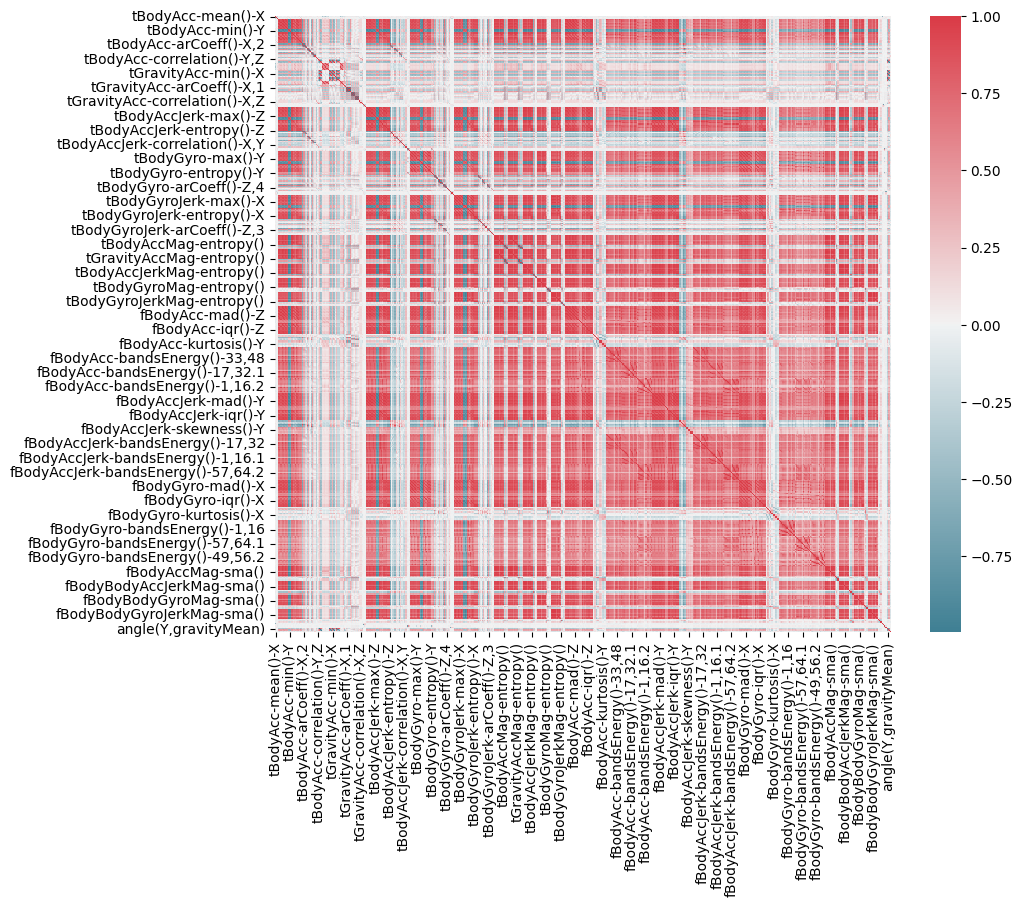

In [ ]:
# check if our features are highly corelated
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
f, ax = plt.subplots(figsize = (10, 8))
corr = train_set.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), 
            cmap = sns.diverging_palette(220, 10, as_cmap = True), square = True, ax = ax)

Due to the sheer amount of features in this dataset, it is a bit difficult to tell which features are highly correlated.

In [ ]:
# Create our X and Y variables
X = train_set.iloc[:, :-2] # For X we want everything except the last two columns
# (everything except subject and activity)
Y = train_set.iloc[:, -1:] # For Y we only want the last column
# (activity)

# split the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
# Check what data types X and Y are
print(X.dtypes)
print(Y.dtypes)

tBodyAcc-mean()-X                       float64
tBodyAcc-mean()-Y                       float64
tBodyAcc-mean()-Z                       float64
tBodyAcc-std()-X                        float64
tBodyAcc-std()-Y                        float64
                                         ...   
angle(tBodyGyroMean,gravityMean)        float64
angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Length: 561, dtype: object
Activity    object
dtype: object


In [ ]:
# We need to label-encode the Y features because they are objects
le = LabelEncoder()
Y_train = le.fit_transform(Y_train.values.ravel())
Y_test = le.fit_transform(Y_test.values.ravel())

In [ ]:
# Now we need to scale the features
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.fit_transform(X_test)

In [ ]:
# Start with a feed-forward neural network model
import tensorflow as tf
model = Sequential()
model.add(Dense(units = 256, activation = 'sigmoid', input_dim = X_train.shape[1]))
model.add(Dense(units = 128, activation = 'sigmoid'))
model.add(Dense(units = 64, activation = 'sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(units = 6, activation = 'sigmoid'))

In [ ]:
# compile a feed-forward neural network for the activity data
opt = tf.keras.optimizers.experimental.AdamW()
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs = 200, batch_size = 32, verbose = 1, validation_data=(X_test, Y_test))

loss, acc = model.evaluate(X_test, Y_test, verbose = 0)
print('Test accuracy: %.3f' %acc)

loss, acc = model.evaluate(X_train, Y_train, verbose = 0)
print('Train accuracy: %.3f' %acc)

Epoch 1/200
184/184 [==============================] - 2s 5ms/step - loss: 1.2540 - accuracy: 0.4120 - val_loss: 0.7809 - val_accuracy: 0.7186
Epoch 2/200
184/184 [==============================] - 1s 4ms/step - loss: 0.5643 - accuracy: 0.7823 - val_loss: 0.3738 - val_accuracy: 0.8525
Epoch 3/200
184/184 [==============================] - 1s 4ms/step - loss: 0.3167 - accuracy: 0.8908 - val_loss: 0.2546 - val_accuracy: 0.9116
Epoch 4/200
184/184 [==============================] - 1s 4ms/step - loss: 0.2197 - accuracy: 0.9223 - val_loss: 0.1852 - val_accuracy: 0.9320
Epoch 5/200
184/184 [==============================] - 1s 4ms/step - loss: 0.1685 - accuracy: 0.9439 - val_loss: 0.1708 - val_accuracy: 0.9307
Epoch 6/200
184/184 [==============================] - 1s 4ms/step - loss: 0.1462 - accuracy: 0.9473 - val_loss: 0.1343 - val_accuracy: 0.9483
Epoch 7/200
184/184 [==============================] - 1s 4ms/step - loss: 0.1160 - accuracy: 0.9597 - val_loss: 0.1390 - val_accuracy: 0.9511

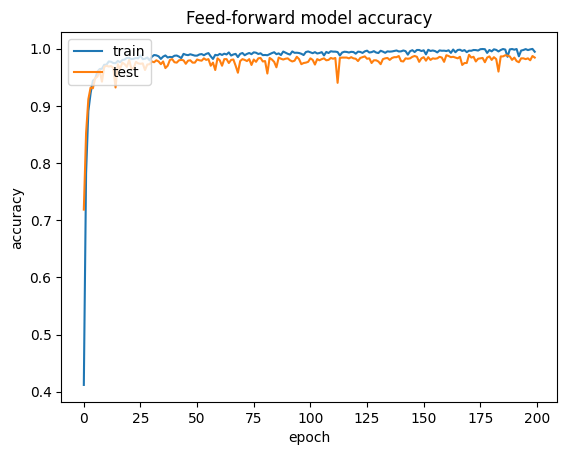

In [ ]:
# Visualize the model accuracy over time
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Feed-forward model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

The feed-forward model had a very impressive accuracy of 98.4% test and 100% train. Now, let's create a convolutional model for comparison.

In [ ]:
# Set up the CNN model 
convmodel = Sequential()
convmodel.add(Conv1D(32, (3, ), activation = 'relu', input_shape = (561, 1)))
convmodel.add(MaxPool1D(2, ))
convmodel.add(Dropout(0.2))
convmodel.add(Flatten())
convmodel.add(Dense(100, activation = 'relu'))
convmodel.add(Dropout(0.2))
convmodel.add(Dense(50, activation = 'relu'))
convmodel.add(Dense(10, activation = 'softmax'))

In [ ]:
# Compile the CNN model for the activity recognition dataset
convmodel.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history2 = convmodel.fit(X_train, Y_train, epochs = 200, validation_data = (X_test, Y_test), batch_size = 32, verbose = 1)

loss, acc = convmodel.evaluate(X_test, Y_test, verbose = 0)
print('Test accuracy: %.3f' %acc)

loss, acc = convmodel.evaluate(X_train, Y_train, verbose = 0)
print('Train accuracy: %.3f' %acc)

Epoch 1/200
184/184 [==============================] - 2s 5ms/step - loss: 1.5137 - accuracy: 0.3600 - val_loss: 1.0773 - val_accuracy: 0.4630
Epoch 2/200
184/184 [==============================] - 1s 4ms/step - loss: 1.0303 - accuracy: 0.5115 - val_loss: 0.8845 - val_accuracy: 0.6968
Epoch 3/200
184/184 [==============================] - 1s 5ms/step - loss: 0.8399 - accuracy: 0.6451 - val_loss: 0.6837 - val_accuracy: 0.7220
Epoch 4/200
184/184 [==============================] - 1s 4ms/step - loss: 0.6502 - accuracy: 0.7361 - val_loss: 0.4938 - val_accuracy: 0.8525
Epoch 5/200
184/184 [==============================] - 1s 5ms/step - loss: 0.4961 - accuracy: 0.8119 - val_loss: 0.3864 - val_accuracy: 0.8715
Epoch 6/200
184/184 [==============================] - 1s 5ms/step - loss: 0.4325 - accuracy: 0.8291 - val_loss: 0.3420 - val_accuracy: 0.8763
Epoch 7/200
184/184 [==============================] - 1s 6ms/step - loss: 0.3637 - accuracy: 0.8623 - val_loss: 0.2912 - val_accuracy: 0.8851

The 1D CNN model had a very impressive test accuracy of 98.8% and a train accuracy of 100%. 

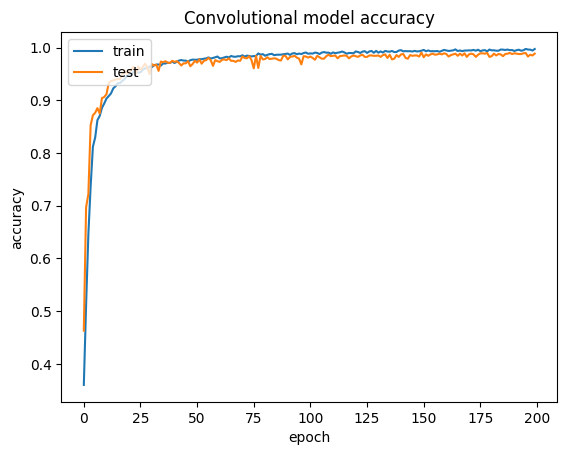

In [ ]:
# Visualize the model accuracy over time
import matplotlib.pyplot as plt
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Convolutional model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

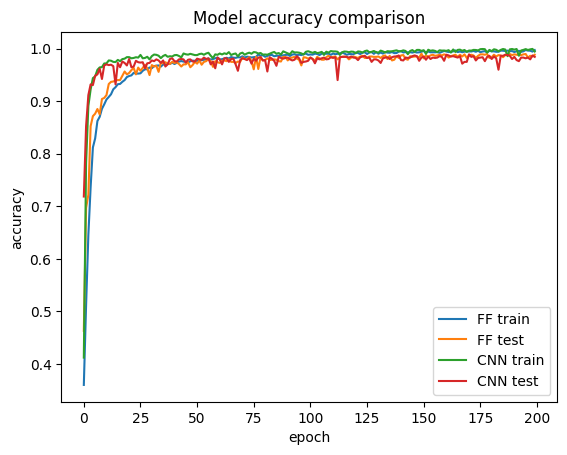

In [ ]:
# Compare the accuracy of both models in one plot
import matplotlib.pyplot as plt
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy comparison')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['FF train', 'FF test', 'CNN train', 'CNN test'], loc = 'lower right')
plt.show()

In [ ]:
# FF testing accuracy
loss, acc = model.evaluate(X_test, Y_test, verbose = 0)

# FF training accuracy
loss2, acc2 = model.evaluate(X_train, Y_train, verbose = 0)

# CNN testing accuracy
loss3, acc3 = convmodel.evaluate(X_test, Y_test, verbose = 0)

# CNN training accuracy
loss4, acc4 = convmodel.evaluate(X_train, Y_train, verbose = 0)

# Create a table to summarize the results
table = {'Model Type': ['Feed-Forward Neural Network', 'Convolutional Neural Network'], 'Test Accuracy (%)': [round(acc, 3) * 100, round(acc3, 3) * 100], 'Test Loss': [loss, loss3], 'Train Accuracy (%)': [round(acc2, 3) * 100, round(acc4, 3) * 100], 'Train Loss': [loss2, loss4]}
# Use a DataFrame because they print out nicer 
df = pd.DataFrame(data = table)
df

,Model Type,Test Accuracy (%),Test Loss,Train Accuracy (%),Train Loss
0,Feed-Forward Neural Network,98.4,0.060346,100.0,0.001692
1,Convolutional Neural Network,98.8,0.034434,100.0,0.003218


As shown in the table above, both of these models have shockingly high accuracy and are remarkably close to one another. However, the Convolutional model ever so slightly edges out the Feed-Forward model by approximately 0.4% in test accuracy. As such, I would conclude that a Convolutional model might be a better choice for this dataset and use case.